# Loan Application Status Prediction

In [1]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data set
df=pd.read_csv('loan_prediction.csv')

In [3]:
# finding the number of rows and columns in the data set.
df.shape

(614, 13)

There are 614 rows and 13 columns in the given data set

In [4]:
# looking at the first 5 rows of the data set.
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


It is clear from the above analysis the data set is a mix of categorical values, string values and numerical values. The data set also contains NaN values.

In [5]:
#finding out the general information about the variables.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From the above analysis it is seen that most of the values are of string type.

In [6]:
# finding out the variables where null values are present.
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

From the above analysis it is seen that six variables are having null values these will be treated in the data cleaning part.

<AxesSubplot:>

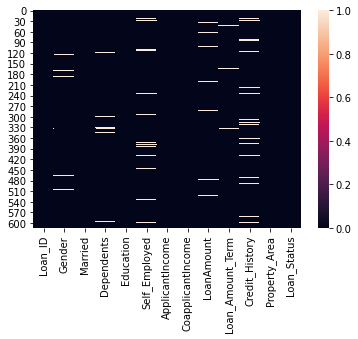

In [7]:
# confirming about the presence of null values with the help of heatmap.
sns.heatmap(df.isnull())

The heat map clearly shows that there are missing values in the data set.

In [107]:
#Finding out the value counts of the target variable.
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

The above analysis clearly shows that there are 422 loan sanctioned cases and 192 loan rejection cases.

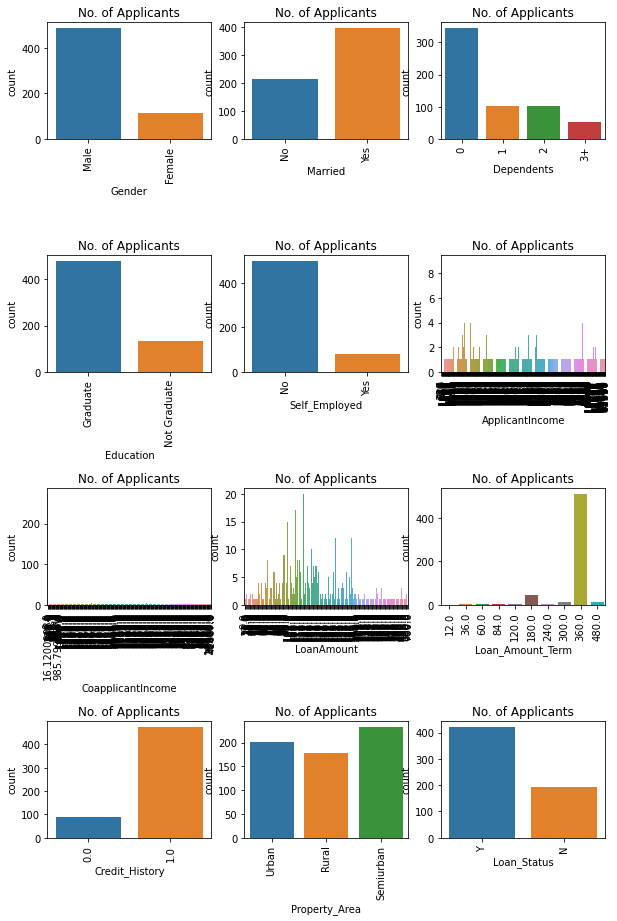

In [8]:
# Finding out the value counts of categories present in the different variables.
variables=['Gender','Married','Dependents','Education', 'Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(variables):
    plt.subplot(4, 3, i+1)
    plt.subplots_adjust(hspace = 1)
    sns.countplot(x=j,data = df)
    plt.xticks(rotation=90)
    plt.title("No. of Applicants")

The above plot shows about the number of applicants present in different categories in each varaible in the data set
1. The number of Male applicants are more than the Female Applicants
2. The number of Married Applicants are more.
3. The number of Applicants having no dependents are more.
4. The number of Applicants are mostly graduates
5. The number of Applicants are less in self employed category.
6. The variables 'Applicants income, coapplicant income & loan amount' have more number of different values hence the plots are of this nature.
7. The number of Applicants having Loan Amount Term as 360 are highest
8. The number of applicants mostly belongs to semiurban and urban areas.
9. The number of Applicants with approved loan are more in numbers.

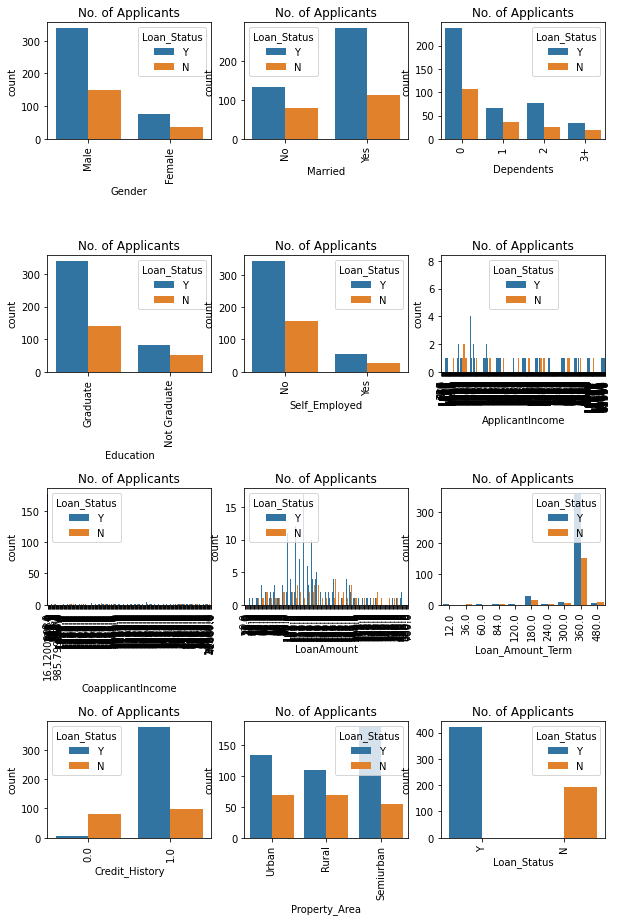

In [9]:
# Finding out the value count of the categories present in different variables inn accordance with the loan approval status.
variables=['Gender','Married','Dependents','Education', 'Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(variables):
    plt.subplot(4, 3, i+1)
    plt.subplots_adjust(hspace = 1)
    sns.countplot(x=j,data = df,hue='Loan_Status')
    plt.xticks(rotation=90)
    plt.title("No. of Applicants")

The above plots are created in accordance with the loan approval status(yes or no).
1. The number of Applicants with loan status as yes are more in male category.
2. The number of Applicants with loan status as yes are more in married category.
3. The number of Applicants with loan status as yes are more with 'no dependent' category.
4. The number of Applicants with loan status as yes are more in Graduate category.
5. The number of Applicants with loan status as yes are less in self employed category.
6. The variables 'Applicants income, coapplicant income & loan amount' have more number of different values hence the plots are of this nature.
7. The number of Applicants with loan status as yes are having Loan Amount Term as 360 are highest
8. The number of applicants with loan status as yes mostly belongs to semiurban and urban areas.
9. The number of Applicants with approved loan are more in numbers.

### Cleaning of the Data

In [10]:
# Dropping the column 'Loan_ID' as this has no impact on the loan approval.
df=df.drop(['Loan_ID'],axis=1)

In [11]:
# checking whether the 'Loan_ID' column is being droped.
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


Renaming the columns for the ease of analysis

In [12]:
df.rename({'ApplicantIncome': 'Applicant_Income', 'LoanAmount': 'Loan_Amount','Loan_Amount_Term':'Term','Property_Area':'Area','Loan_Status':'Status'}, axis=1, inplace=True)

In [13]:
df.rename({'CoapplicantIncome':'Coapplicant_Income'},axis=1,inplace=True)

#### filling the null values present in different variables---- using mode, as the variables are categorical in nature.

In [14]:
m=df['Gender'].mode()[0]
print('mode:',m)
df['Gender'].fillna(m,inplace=True)

mode: Male


In [15]:
m1=df['Married'].mode()[0]
print('mode:',m1)
df['Married'].fillna(m1,inplace=True)

mode: Yes


In [16]:
m2=df['Dependents'].mode()[0]
print('mode:',m2)
df['Dependents'].fillna(m2,inplace=True)

mode: 0


In [17]:
m3=df['Self_Employed'].mode()[0]
print('mode:',m3)
df['Self_Employed'].fillna(m3,inplace=True)

mode: No


In [18]:
m4=df['Loan_Amount'].mode()[0]
print('mode:',m4)
df['Loan_Amount'].fillna(m4,inplace=True)

mode: 120.0


In [19]:
m5=df['Term'].mode()[0]
print('mode:',m5)
df['Term'].fillna(m5,inplace=True)

mode: 360.0


In [20]:
m6=df['Credit_History'].mode()[0]
print('mode:',m6)
df['Credit_History'].fillna(m6,inplace=True)

mode: 1.0


#### using Label Encoder to convert all the categorical values into numeric values.

In [22]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le=LabelEncoder()
categ=['Gender','Married','Education','Self_Employed','Area','Status']
df[categ] = df[categ].apply(le.fit_transform)

In [28]:
# Checking for transformed values.
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1


All the values are transformed into numerical.

In [29]:
# Checking for the data type of the variables once again.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              614 non-null    int32  
 1   Married             614 non-null    int32  
 2   Dependents          614 non-null    object 
 3   Education           614 non-null    int32  
 4   Self_Employed       614 non-null    int32  
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    float64
 8   Term                614 non-null    float64
 9   Credit_History      614 non-null    float64
 10  Area                614 non-null    int32  
 11  Status              614 non-null    int32  
dtypes: float64(4), int32(6), int64(1), object(1)
memory usage: 43.3+ KB


it is seen that the variable 'Dependents' is still showing as object type even after having numeric values, hence converting it to int type.

In [31]:
# finding out the unique values present in teh Deendent variable
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

The variable Dependents has 4 unique values as 0,1,2,3+------------ 0,1,2 is ok with the analysis but 3+ might create trouble, hence converting it with the help of label encoder.

In [32]:
cate=['Dependents']
df[cate] = df[cate].apply(le.fit_transform)

### Splitting the data set into predictor(feature) variable (x) and target variable(y)

In [34]:
x=df.iloc[:,0:11]
x

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2


In [35]:
y=df.iloc[:,-1]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Status, Length: 614, dtype: int32

In [36]:
# finding out the number of appicants present in the target variable.
y.value_counts()

1    422
0    192
Name: Status, dtype: int64

<AxesSubplot:xlabel='Status', ylabel='count'>

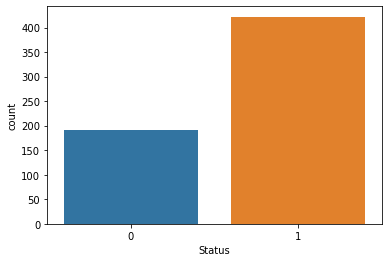

In [37]:
sns.countplot(y)

here total number of Zeros are not equal one or not even close hence model will be baised as more number of zeros are present (0--not approved, 1--yes approved)

### Applying SMOTE as this is a imbalanced dataset

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [40]:
# checking for the changed values after applying SMOTE
trainx.value_counts()

Gender  Married  Dependents  Education  Self_Employed  Applicant_Income  Coapplicant_Income  Loan_Amount  Term        Credit_History  Area
0       0        0           0          0              645               3683.000000         113.000000   480.000000  1.000000        0       1
1       1        0           1          0              2917              536.000000          66.000000    360.000000  1.000000        0       1
                             0          1              5818              2160.000000         184.000000   360.000000  1.000000        1       1
                                                       9560              0.000000            191.000000   360.000000  1.000000        1       1
                                                       9963              0.000000            180.000000   360.000000  1.000000        0       1
                                                                                                                                             

From the above analysis it is clear that total number of rows are now increased to 844. now checking with the target varaible.

In [41]:
# Checking for the value count in the target variable.
trainy.value_counts()

1    422
0    422
Name: Status, dtype: int64

The above analysis shows that the number of rows with '0' and '1' are now equal, hence the baisness is reduced.

<AxesSubplot:xlabel='Status', ylabel='count'>

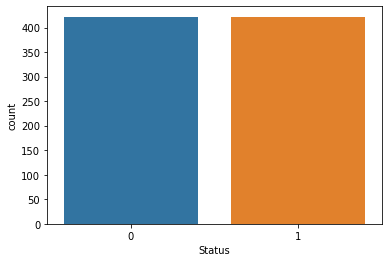

In [42]:
# Confirming the number of value count with the help of countplot
sns.countplot(trainy)

### Standardising the Data:  Normalising the data 

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scale=StandardScaler()
trainx=scale.fit_transform(trainx)

### Splitting the data set into training and testing parts

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
xtrain,xtest,ytrain,ytest = train_test_split(trainx,trainy,test_size=.30,random_state=45)

In [47]:
xtrain.shape

(590, 11)

In [48]:
ytrain.shape

(590,)

In [49]:
xtest.shape

(254, 11)

In [50]:
ytest.shape

(254,)

### Fitting different models

In [53]:
from sklearn.svm import SVC
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [54]:
sv=svm.SVC()
sv.fit(xtrain,ytrain)
t=sv.score(xtrain,ytrain)
print(round(t,2))

predsvc=sv.predict(xtest)
print(accuracy_score(ytest,predsvc))
print(confusion_matrix(ytest,predsvc))
print(classification_report(ytest,predsvc))

0.8
0.7952755905511811
[[ 77  42]
 [ 10 125]]
              precision    recall  f1-score   support

           0       0.89      0.65      0.75       119
           1       0.75      0.93      0.83       135

    accuracy                           0.80       254
   macro avg       0.82      0.79      0.79       254
weighted avg       0.81      0.80      0.79       254



In [55]:
dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
dtc.score(xtrain,ytrain)
preddtc=dtc.predict(xtest)
print(accuracy_score(ytest,preddtc))
print(confusion_matrix(ytest,preddtc))
print(classification_report(ytest,preddtc))

0.7795275590551181
[[ 95  24]
 [ 32 103]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       119
           1       0.81      0.76      0.79       135

    accuracy                           0.78       254
   macro avg       0.78      0.78      0.78       254
weighted avg       0.78      0.78      0.78       254



In [56]:
# k=5
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
knn.score(xtrain,ytrain)
predknn=knn.predict(xtest)
print(accuracy_score(ytest,predknn))
print(confusion_matrix(ytest,predknn))
print(classification_report(ytest,predknn))

0.7834645669291339
[[ 80  39]
 [ 16 119]]
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       119
           1       0.75      0.88      0.81       135

    accuracy                           0.78       254
   macro avg       0.79      0.78      0.78       254
weighted avg       0.79      0.78      0.78       254



In [57]:
# k=3
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
knn.score(xtrain,ytrain)
predknn=knn.predict(xtest)
print(accuracy_score(ytest,predknn))
print(confusion_matrix(ytest,predknn))
print(classification_report(ytest,predknn))

0.7874015748031497
[[ 81  38]
 [ 16 119]]
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       119
           1       0.76      0.88      0.82       135

    accuracy                           0.79       254
   macro avg       0.80      0.78      0.78       254
weighted avg       0.79      0.79      0.78       254



In [58]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
pred=lg.predict(xtest)
print("accuracy_score :",accuracy_score(pred,ytest))
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

accuracy_score : 0.7952755905511811
[[ 77  42]
 [ 10 125]]
              precision    recall  f1-score   support

           0       0.89      0.65      0.75       119
           1       0.75      0.93      0.83       135

    accuracy                           0.80       254
   macro avg       0.82      0.79      0.79       254
weighted avg       0.81      0.80      0.79       254



The accuracy scores of Support Vector Classifier and Logistic Regression are same as 79.52%. The f1 score is also same as 75% with the precision rate of 89%. now moving ahead with Ensemble Techniques to improve upon th scores intrun improving the model performance.  

### Ensenble Techniques

In [59]:
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
rfc.score(xtrain,ytrain)
predrfc=rfc.predict(xtest)
print(accuracy_score(ytest,predrfc))
print(confusion_matrix(ytest,predrfc))
print(classification_report(ytest,predrfc))

0.8582677165354331
[[ 93  26]
 [ 10 125]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.84       119
           1       0.83      0.93      0.87       135

    accuracy                           0.86       254
   macro avg       0.87      0.85      0.86       254
weighted avg       0.86      0.86      0.86       254



In [60]:
abc=AdaBoostClassifier()
abc.fit(xtrain,ytrain)
abc.score(xtrain,ytrain)
predabc=abc.predict(xtest)
print(accuracy_score(ytest,predabc))
print(confusion_matrix(ytest,predabc))
print(classification_report(ytest,predabc))

0.8188976377952756
[[ 86  33]
 [ 13 122]]
              precision    recall  f1-score   support

           0       0.87      0.72      0.79       119
           1       0.79      0.90      0.84       135

    accuracy                           0.82       254
   macro avg       0.83      0.81      0.82       254
weighted avg       0.83      0.82      0.82       254



From the scores of above to ensemble techniques, the scores of Random Forest Classifier is coming as best. Teh accuracy score is 81.88%, f1 score is 79%with the precision rate of 87%. Hence going ahead for cross validation of Random Forest Classifier.

### Cross Validation

In [61]:
score=cross_val_score(rfc,trainx,trainy,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.71597633 0.73964497 0.85798817 0.84615385 0.89285714]
0.810524091293322
0.06966229662233074


In [62]:
from sklearn.model_selection import KFold

In [63]:
KFold=KFold(10)
score=cross_val_score(rfc,trainx,trainy,cv=KFold)
print(score)
print(score.mean())
print(score.std())

[0.77647059 0.76470588 0.74117647 0.8        0.80952381 0.70238095
 0.85714286 0.89285714 0.88095238 0.89285714]
0.8118067226890755
0.06367825534179992


The Cross Validation Scores of Rndom Forest Classifier are satisfactory as the mean score is 81.18% with the standard deviation as 0.06. Hence moving ahead with Hyper Parametric Tuning

### Hyper Parametric Tuning

In [66]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = {  'bootstrap': [True], 
              'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2','sqrt',None], 
              'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [67]:
g_search = GridSearchCV(estimator = rfc, 
                        param_grid = param_grid, 
                        cv = 3, 
                        n_jobs = 1,
                        verbose = 0, 
                        return_train_score=True)

In [68]:
g_search.fit(xtrain, ytrain);

In [69]:
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 70}


In [72]:
modelrfc=RandomForestClassifier(bootstrap= True, max_depth= 5, max_features= 'log2', n_estimators=70 )
modelrfc.fit(xtrain,ytrain)
print('modelrfc score:',modelrfc.score(xtrain,ytrain))

modelrfcpredict=modelrfc.predict(xtest)
print('accuraccy score = ',accuracy_score(ytest,modelrfcpredict))
print(confusion_matrix(ytest,modelrfcpredict))
print(classification_report(ytest,modelrfcpredict))

modelrfc score: 0.8322033898305085
accuraccy score =  0.8307086614173228
[[ 81  38]
 [  5 130]]
              precision    recall  f1-score   support

           0       0.94      0.68      0.79       119
           1       0.77      0.96      0.86       135

    accuracy                           0.83       254
   macro avg       0.86      0.82      0.82       254
weighted avg       0.85      0.83      0.83       254



After Tuning the Hyer parameters, The accuracy score comes out to be 83% with the f1 sore as 79%, with the improved precision rate of 94% as compared to previous precision rate of 90%. Now moving ahead with AUC-Roc to find out How god the model is working

### Applying AUC-ROC 

Applying the AUC-ROC on the Random Forest Classifier without Hypertuned model as it is giving the better accuracy score and f1 score.

In [77]:
y_pred_prob=rfc.predict_proba(xtest)[:,1]
print('The predicted probailities are:',y_pred_prob)
fpr,tpr,thresholds=roc_curve(ytest,y_pred_prob)
print('The fpr values:',fpr)
print('The tpr values:',tpr)
print('The threshold values are:',thresholds)

The predicted probailities are: [0.55 0.83 0.68 0.79 0.82 0.82 0.97 0.67 0.57 0.83 0.64 0.09 0.03 0.06
 0.6  0.82 0.36 0.6  0.05 0.47 0.72 0.88 0.82 0.26 0.04 0.46 0.92 0.68
 0.75 0.75 0.03 0.06 0.81 0.11 0.04 0.05 0.8  0.74 0.08 0.23 0.56 0.29
 0.58 0.79 0.04 0.85 0.69 0.85 0.3  0.68 0.67 0.26 0.66 0.72 0.41 0.84
 0.07 0.9  0.8  0.65 0.02 0.71 0.93 0.79 0.68 0.69 0.08 0.88 0.13 0.74
 0.92 0.48 0.8  0.03 0.57 0.71 0.57 0.7  0.43 0.17 0.89 0.76 0.26 0.23
 0.04 0.56 0.7  0.05 0.61 0.9  0.28 0.76 0.   0.02 0.4  0.77 0.04 0.77
 0.79 0.55 0.65 0.44 0.47 0.02 0.79 0.7  0.89 0.16 0.73 0.   0.13 0.25
 0.6  0.14 0.86 0.8  0.01 0.94 0.67 0.72 0.02 0.25 0.02 0.86 0.77 0.3
 0.81 0.89 0.6  0.03 0.74 0.43 0.49 0.64 0.5  0.72 0.89 0.78 0.05 0.62
 0.58 0.14 0.04 0.88 0.77 0.24 0.82 0.02 0.77 0.84 0.03 0.07 0.81 0.78
 0.72 0.8  0.91 0.78 0.03 0.88 0.6  0.58 0.02 0.65 0.82 0.98 0.04 0.91
 0.85 0.22 0.41 0.72 0.39 0.68 0.84 0.59 0.71 0.91 0.88 0.06 0.48 0.44
 0.53 0.76 0.04 0.75 0.5  0.64 0.05 0.95 0.06 

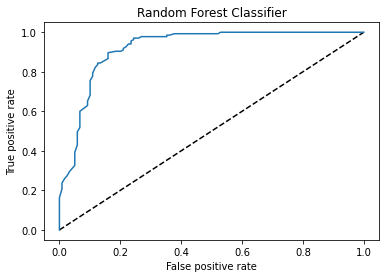

In [78]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

In [79]:
auc_score=roc_auc_score(ytest,rfc.predict(xtest))

In [80]:
print(auc_score)

0.8537192654839714


The AUC Score is coming as 85% hence saving the model for further use.

### Saving the Model  

In [81]:
import joblib

joblib.dump(rfc,'rfc_LoanApplication_model.obj')

rfcloadmodel=joblib.load('rfc_LoanApplication_model.obj')
pred=rfcloadmodel.predict(xtest)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1
 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0
 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0
 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0]
